Here is an attempt and compensating and pregating.

In [1]:
import sys
sys.path.append('../')
import compensateflowcyte as cfc
import gateflowcyte as gfc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
comp,cmeta=cfc.getCompensated('A4_raw.fcs')

FCS3.1
[58, 3605, 3606, 52286214, 0, 0]
5


In [3]:
comp.head()

,T0,T1,INFO,FS00-H,FS00-A,FS00-W,FS01-H,FS01-A,FS01-W,SS02-H,...,FL10-H,FL10-A,FL10-W,FL13-H,FL13-A,FL13-W,FL17-H,FL17-A,FL17-W,TIME
0,-1396154348,0,868096,58024192,96669696,1112080384,1110838784,1779248128,993820672,347496448,...,1701888,1.635079e+06,561250304,2458624,2740224.0,678625280,2468864,2597120.0,642646016,5797626
1,-1396153901,0,868096,49383424,58628864,723189760,641084928,864103424,840728576,54411776,...,13056,1.598414e+04,41975808,3328,12544.0,20381696,82688,37888.0,119832576,5797627
2,-1396152839,0,868096,123719168,173062912,834502656,961208064,1812524032,1199439872,291883264,...,1540096,1.973602e+06,753205248,2160128,2163712.0,469204992,4014848,4945152.0,725254144,5797629
3,-1396150530,0,868096,312911872,523112960,998506496,1894009856,2147483392,1433206784,1023461376,...,4802048,7.508235e+06,911310848,6752256,9140224.0,867598336,9154816,13964800.0,964657152,5797634
4,-1396146718,0,868096,156853504,292455680,1098383360,1154133248,2147483392,1557856256,440052224,...,3191808,5.110801e+06,1046511616,4830208,8096512.0,1031798784,4570112,8100608.0,1106935808,5797641


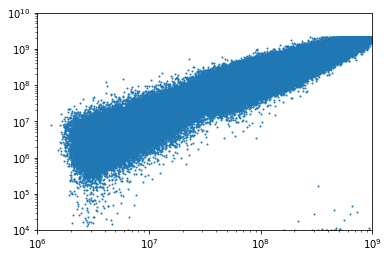

In [4]:
#now need to do the scatter gate (SS02-A vs. FS00-A)
plt.scatter(comp['FS00-A'],comp['SS02-A'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e6,1e9)
plt.ylim(1e4,1e10)
plt.show()

In [5]:
#show this plot in napari, will create the viewer as well
fig,figimg,viewer=gfc.addNapariHist(comp,'FS00-A','SS02-A',limits=[1e6,1e9,1e6,1e10],logs=[True,True])

In [10]:
#once the gate is added it will be in the data object from the last layer
scattergate=viewer.layers[-1].data[0]
scattergate

array([[779.51181557, 482.18892646],
       [730.96930496, 977.72705569],
       [300.15452322, 983.79486952],
       [306.22233705, 488.25674029]])

In [6]:
#copy the gate from the cell above so we can skip the interactive part if we already have the gates defined
scattergate=np.array([[779.51181557, 482.18892646],
       [730.96930496, 977.72705569],
       [300.15452322, 983.79486952],
       [306.22233705, 488.25674029]])

In [7]:
inscatgate,_,_=gfc.plotGateContains(comp['FS00-A'],comp['SS02-A'],scattergate,limits=[1e6,1e9,1e6,1e10],logs=[True,True])

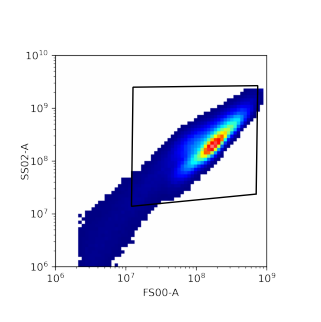

In [8]:
#if we want we can draw the figure with the gate on it here
overfig,overimg=gfc.overlayImageGate(figimg,scattergate)
overfig.set_dpi(100)
overfig

In [9]:
#now draw the image to get the single cell gate
_,figimg,_=gfc.addNapariHist(comp,'FS00-W','FS00-H',limits=[4e8,3e9,1e6,1e9],logs=[True,True],viewer=viewer)

In [28]:
viewer.layers[-1].data[0]

array([[263.74764025, 474.09850803],
       [955.47841657, 482.18892646],
       [957.50102117, 310.26753469],
       [265.77024486, 322.40316235]])

In [10]:
scgate=np.array([[263.74764025, 474.09850803],
       [955.47841657, 482.18892646],
       [957.50102117, 310.26753469],
       [265.77024486, 322.40316235]])

In [11]:
inscgate,_,_=gfc.plotGateContains(comp['FS00-W'],comp['FS00-H'],scgate,limits=[4e8,3e9,1e6,1e9],logs=[True,True])

In [12]:
#now draw the image to get the expressing gate
_,figimg,_=gfc.addNapariHist(comp,'FL03-A','FL17-A',limits=[3e3,1e10,5e3,1e7],logs=[True,True],viewer=viewer)

In [41]:
viewer.layers[-1].data[0]

array([[939.29757969, 372.96827757],
       [937.27497508, 941.32017273],
       [356.78745227, 947.38798656],
       [374.99089376, 512.5279956 ]])

In [13]:
expgate=np.array([[939.29757969, 372.96827757],
       [937.27497508, 941.32017273],
       [356.78745227, 947.38798656],
       [374.99089376, 512.5279956 ]])

In [14]:
inexpgate,_,_=gfc.plotGateContains(comp['FL03-A'],comp['FL17-A'],expgate,limits=[3e3,1e10,5e3,1e7],logs=[True,True])

C:\Users\jru\Miniconda3\envs\naparienv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
inallgates=np.array(inscatgate) & np.array(inscgate) & np.array(inexpgate)
gated=comp[inallgates].copy()
print(gated.shape)
gated.head()

(104954, 28)


,T0,T1,INFO,FS00-H,FS00-A,FS00-W,FS01-H,FS01-A,FS01-W,SS02-H,...,FL10-H,FL10-A,FL10-W,FL13-H,FL13-A,FL13-W,FL17-H,FL17-A,FL17-W,TIME
9,-1396141970,0,868096,164225536,202983424,742195200,1203360000,1767147008,949583872,294664448,...,63261952,6.639710e+07,636092416,33336576,36046336.0,655360000,614656,631552.0,571408384,5797651
19,-1396131424,0,868096,148475392,174208000,690913280,1209892352,1726370816,920190976,200220672,...,151727872,1.623939e+08,673742848,82380544,90364928.0,678232064,402944,363520.0,428638208,5797672
27,-1396120401,0,868096,168744704,198043392,711720960,1246867712,1655080960,894402560,229061376,...,2323968,2.107255e+06,432701440,1340928,1105152.0,455999488,345088,427264.0,626458624,5797694
31,-1396115901,0,868096,49584896,51941120,628588544,372074496,510794752,869105664,65764096,...,2302464,2.432866e+06,647790592,1220864,1247744.0,580517888,79104,28928.0,124813312,5797703
47,-1396093437,0,868096,183159808,212843264,709853184,1024466944,1382457856,910983168,271690752,...,11295488,1.226453e+07,662994944,6236416,6407168.0,631537664,470528,476928.0,445710336,5797748


In [16]:
cfc.saveDF('A4_pycompgate.fcs',gated,cmeta)

In [17]:
gated['FRET']=gated['FL04-A']/gated['FL10-A']
gated['Acceptor']=gated['FL10-A']/1000000.0

In [18]:
fig,figimg=gfc.drawHist(gated,'Acceptor','FRET',limits=[1,2500,-0.2,1],logs=[True,False])

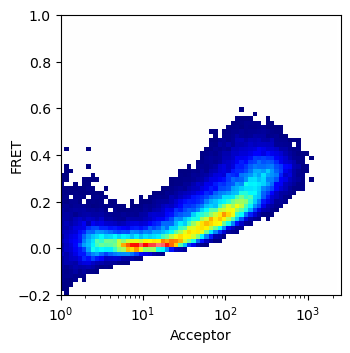

In [19]:
fig.set_dpi(100)
fig